In [117]:
import numpy as np
from sklearn import svm

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]
x_test = mnist['x_test'][mnist['y_test']<=1]/255.
y_test = mnist['y_test'][mnist['y_test']<=1]

x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])#兩種characteristic變成2D的圖
x_test = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_test])

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)#用2D的分布，區分01

s_train = clf.score(x_train, y_train)
s_test = clf.score(x_test, y_test)
print('Performance (training):', s_train)
print('Performance (testing):', s_test)


Performance (training): 0.9925779707856297
Performance (testing): 0.9947990543735225


In [118]:
x_train

array([[0.15553721, 0.1253268 ],
       [0.08570928, 0.49346405],
       [0.08826531, 0.59305556],
       ...,
       [0.07569528, 0.42663399],
       [0.17420468, 0.19771242],
       [0.04815426, 0.29093137]])

In [121]:
y_train

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

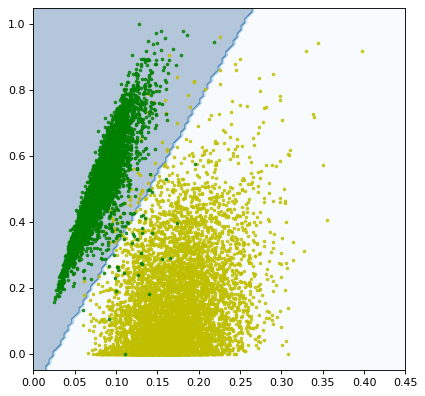

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]
x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)

fig = plt.figure(figsize=(6,6), dpi=80)

xv, yv = np.meshgrid(np.linspace(0.,0.45,100),np.linspace(-0.05,1.05,100))#創造XY座標
zv = clf.predict(np.c_[xv.ravel(), yv.ravel()])
plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=.3, cmap='Blues')

plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], c = 'g', s=5, alpha=0.8)
plt.show()

In [50]:
x_train[:,0]

array([0.15553721, 0.08570928, 0.08826531, ..., 0.07569528, 0.17420468,
       0.04815426])

In [100]:
zv

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [51]:
x_train

array([[0.15553721, 0.1253268 ],
       [0.08570928, 0.49346405],
       [0.08826531, 0.59305556],
       ...,
       [0.07569528, 0.42663399],
       [0.17420468, 0.19771242],
       [0.04815426, 0.29093137]])

In [52]:
yv

array([[-0.05      , -0.05      , -0.05      , ..., -0.05      ,
        -0.05      , -0.05      ],
       [-0.03888889, -0.03888889, -0.03888889, ..., -0.03888889,
        -0.03888889, -0.03888889],
       [-0.02777778, -0.02777778, -0.02777778, ..., -0.02777778,
        -0.02777778, -0.02777778],
       ...,
       [ 1.02777778,  1.02777778,  1.02777778, ...,  1.02777778,
         1.02777778,  1.02777778],
       [ 1.03888889,  1.03888889,  1.03888889, ...,  1.03888889,
         1.03888889,  1.03888889],
       [ 1.05      ,  1.05      ,  1.05      , ...,  1.05      ,
         1.05      ,  1.05      ]])

In [53]:
np.c_[xv.ravel(), yv.ravel()]

array([[ 0.        , -0.05      ],
       [ 0.00454545, -0.05      ],
       [ 0.00909091, -0.05      ],
       ...,
       [ 0.44090909,  1.05      ],
       [ 0.44545455,  1.05      ],
       [ 0.45      ,  1.05      ]])

In [54]:
xv.ravel()

array([0.        , 0.00454545, 0.00909091, ..., 0.44090909, 0.44545455,
       0.45      ])

In [62]:
cv=clf.predict([[5,5],[0.2,9]])

In [30]:
zv

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [33]:
cv.reshape(xv.shape)

ValueError: cannot reshape array of size 2 into shape (100,100)

[LibSVM]Performance (training): 0.9969
Performance (testing): 0.917


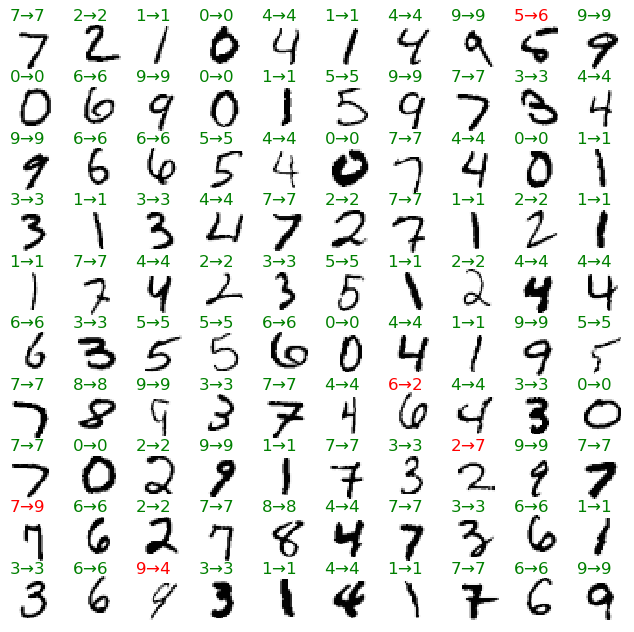

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = mnist['y_train'][:10000]
x_test = mnist['x_test']/255.
y_test = mnist['y_test']

x_train = np.array([img.reshape((784,)) for img in x_train])
x_test = np.array([img.reshape((784,)) for img in x_test])

clf = svm.SVC(kernel='linear', verbose=True)
clf.fit(x_train, y_train)

s_train = clf.score(x_train, y_train)
s_test = clf.score(x_test, y_test)
print('Performance (training):', s_train)
print('Performance (testing):', s_test)

p_test = clf.predict(x_test)

fig = plt.figure(figsize=(10,10), dpi=80)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(mnist['x_test'][i], cmap='Greys')
    c='Green'
    if y_test[i]!=p_test[i]: c='Red'
    plt.text(0.,0.,'$%d\\to%d$' % (y_test[i],p_test[i]),color=c,fontsize=15)
plt.show()


In [41]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

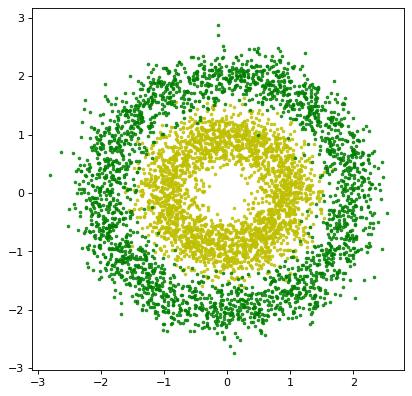

In [32]:
import numpy as np
import matplotlib.pyplot as plt

y_train = np.random.randint(0,2,5000)
rho = np.abs(np.random.randn(5000)/4.+1.+y_train)
phi = np.random.rand(5000)*np.pi*2.
x_train = np.c_[rho*np.cos(phi),rho*np.sin(phi)]

fig = plt.figure(figsize=(6,6), dpi=80)
plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], c = 'g', s=5, alpha=0.8)
plt.show()

In [66]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Performance (training): 0.9792


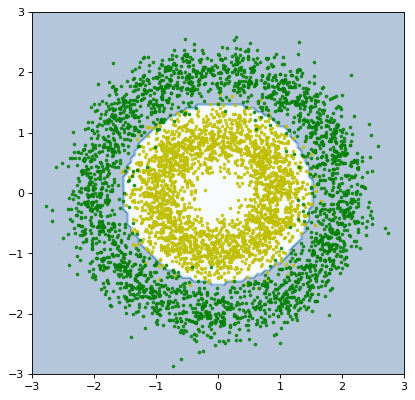

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

y_train = np.random.randint(0,2,5000)
rho = np.abs(np.random.randn(5000)/4.+1.+y_train)
phi = np.random.rand(5000)*np.pi*2.
x_train = np.c_[rho*np.cos(phi),rho*np.sin(phi)]

clf = svm.SVC(kernel='rbf', C=1.)#換成RBF
clf.fit(x_train, y_train)

s_train = clf.score(x_train, y_train)
print('Performance (training):', s_train)

fig = plt.figure(figsize=(6,6), dpi=80)

xv, yv = np.meshgrid(np.linspace(-3.,3.,100),np.linspace(-3.,3.,100))
zv = clf.predict(np.c_[xv.ravel(), yv.ravel()])
plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=.3, cmap='Blues')

plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], c = 'g', s=5, alpha=0.8)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] coef0=10, gamma=1 ...............................................
[CV] ................... coef0=10, gamma=1, score=0.995, total=   0.1s
[CV] coef0=10, gamma=1 ...............................................
[CV] ................... coef0=10, gamma=1, score=0.991, total=   0.1s
[CV] coef0=10, gamma=1 ...............................................
[CV] ................... coef0=10, gamma=1, score=0.995, total=   0.1s
[CV] coef0=10, gamma=10 ..............................................
[CV] .................. coef0=10, gamma=10, score=0.995, total=   0.1s
[CV] coef0=10, gamma=10 ..............................................
[CV] .................. coef0=10, gamma=10, score=0.991, total=   0.1s
[CV] coef0=10, gamma=10 ..............................................
[CV] .................. coef0=10, gamma=10, score=0.995, total=   0.1s
[CV] coef0=100, gamma=1 ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.3s finished


Performance (training): 0.9937623371496249
Performance (testing): 0.9952718676122931


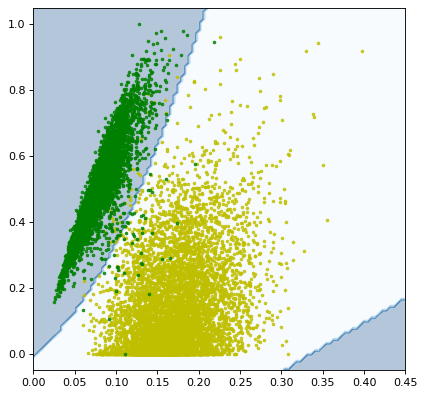

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV 


mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]
x_test = mnist['x_test'][mnist['y_test']<=1]/255.
y_test = mnist['y_test'][mnist['y_test']<=1]

x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])
x_test = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_test])

# clf = svm.SVC(kernel='rbf', C=1.,gamma=50)#gamma要自己調
clf = svm.SVC(kernel='poly')
# gamma=10,coef0=100
param = {'coef0':[10,100], 'gamma':[1,10]}
grid = GridSearchCV(clf, param, verbose=3)
grid.fit(x_train, y_train) 
# clf.fit(x_train, y_train)

s_train = grid.score(x_train, y_train)
s_test = grid.score(x_test, y_test)
print('Performance (training):', s_train)
print('Performance (testing):', s_test)

fig = plt.figure(figsize=(6,6), dpi=80)

xv, yv = np.meshgrid(np.linspace(0.,0.45,100),np.linspace(-0.05,1.05,100))
zv = grid.predict(np.c_[xv.ravel(), yv.ravel()])
plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=.3, cmap='Blues')

plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], c = 'y', s=5, alpha=0.8)
plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], c = 'g', s=5, alpha=0.8)
plt.show()

In [87]:
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=100,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [156]:
import numpy as np
from sklearn import svm

def scan_over_svm_classifier(x_train, y_train, R, S):
    y_test = np.zeros(101)
    ### START YOUR CODE HERE ###

    clf = svm.SVC(kernel='linear', C=1.0)
    clf.fit(x_train, y_train)
    
    y_test = clf.predict([[R,S,i*0.01] for i in range(0,101)])
#     s_train = clf.score(x_train, y_train)
    
    #### END YOUR CODE HERE ####
    return y_test


In [157]:
x_train=np.array([[9,4,2],[100,99,60],[70,50,420]])
y_train=np.array([1,0,0])
R=5
S=6

In [155]:
scan_over_svm_classifier(x_train, y_train, R, S)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [158]:
array2D = [[R,S,i*0.01] for i in range(0,101)]
array2D

In [ ]:
x_train=np.array([[9,4,2],[100,99,60],[70,50,420]])
y_train=np.array([1,0,0])
R=5
S=6

In [160]:
import numpy as np
from sklearn import svm

def scan_over_svm_classifier(x_train, y_train, R, S):
    y_test = np.zeros(101)
    ### START YOUR CODE HERE ###

#     clf = svm.SVC(kernel='linear', C=1.0)
#     clf.fit(x_train, y_train)
    
    clf = svm.SVC(kernel='rbf')
    param = {'C':[0.5,1.0], 'gamma':[0.5,1.0,2.0]}
    grid = GridSearchCV(clf, param)
    grid.fit(x_train, y_train) 
    

    
#     y_test = clf.predict([[R,S,i*0.01] for i in range(0,101)])

    y_test = grid.predict([[R,S,i*0.01] for i in range(0,101)])


    
    #### END YOUR CODE HERE ####
    return y_test


In [193]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def best_trained_svm_classifier(x_train, y_train, x_test):
    y_test = np.zeros(7)
    ### START YOUR CODE HERE ###

    clf = svm.SVC(kernel='rbf')
    param = {'C':[0.5,1.0], 'gamma':[0.5,1.0,2.0]}
    grid = GridSearchCV(clf, param)
    grid.fit(x_train, y_train) 

    y_test = grid.predict(x_test)
    #### END YOUR CODE HERE ####
    return y_test


In [194]:
x_train=np.array([[9,4,2],[9,4,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
x_test=np.array([[9,4,2],[9,4,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
y_train=np.array([1,1,1,0,0,0,0])
R=1000
S=100

In [195]:
best_trained_svm_classifier(x_train, y_train, x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([1, 1, 1, 0, 0, 0, 0])

In [364]:
import numpy as np
from sklearn import svm

def train_and_deploy_svm_classifier(x_data, y_data):
    y_predict = np.zeros(1500)
    
#     y_predict = np.zeros(9)

    
    
    ### START YOUR CODE HERE ###
    
    setA_x=x_data[0:500,:]
    setA_y=y_data[0:500]
    setB_x=x_data[500:1000,:]
    setB_y=y_data[500:1000]
    setC_x=x_data[1000:1500,:]
    setC_y=y_data[1000:1500]



#     setA_x=np.array([[9,4,2],[9,4,5],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setA_y=y_data=np.array([1,1,1,0,0,0,0])
#     setB_x=np.array([[9,4,2],[9,2,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setB_y=y_data=np.array([1,1,1,0,0,0,0])
#     setC_x=np.array([[9,4,2],[9,4,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setC_y=y_data=np.array([1,1,0,0,0,0,0])

#     clf = svm.SVC(kernel='rbf', C=1)
#     clf.fit(setA_x, setA_y)

#     ABC
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    
    
    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setA_x, setA_y)
        score_C[i]=clf.score(setB_x,setB_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setA_x, setA_y)
    y_predict[1000:1500]=clf.predict(setC_x)
#     y_predict[6:9]=score_C
    
#     BCA
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    

    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setB_x, setB_y)
        score_C[i]=clf.score(setC_x,setC_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setB_x, setB_y)
    y_predict[0:500]=clf.predict(setA_x)
#     y_predict[0:3]=score_C
    
    
#     CAB
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    
    
    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setC_x, setC_y)
        score_C[i]=clf.score(setA_x,setA_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setC_x, setC_y)
    y_predict[500:1000]=clf.predict(setB_x)    
#     y_predict[3:6]=score_C
    
    
    #### END YOUR CODE HERE ####
    return y_predict


In [365]:
x_data=np.array([[9,4,2],[9,4,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
y_data=np.array([1,1,1,0,0,0,0])

In [366]:
train_and_deploy_svm_classifier(x_data, y_data)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
y_data=np.array([1,1,1,1,0,0,0])

In [17]:
np.where(y_data==np.max(y_data))[0][0]

0

In [332]:
np.find(np.max(y_data))

AttributeError: module 'numpy' has no attribute 'find'

In [48]:
parameter_C=np.array([0.5,1.0,2.0])
score_C=np.array([10000,1,2.0])

In [49]:
C=parameter_C[np.where(score_C==np.max(score_C))[0][0]]

In [50]:
C

0.5

In [159]:
#HW1

In [29]:
import numpy as np
from sklearn import svm

def scan_over_svm_classifier(x_train, y_train, R, S):
    y_test = np.zeros(101)
    ### START YOUR CODE HERE ###

    clf = svm.SVC(kernel='linear', C=1.0)
    clf.fit(x_train, y_train)
    
    y_test = clf.predict([[R,S,i*0.01] for i in range(0,101)])
    #### END YOUR CODE HERE ####
    return y_test

In [2]:
#HW2

In [3]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def best_trained_svm_classifier(x_train, y_train, x_test):
    y_test = np.zeros(100)
    ### START YOUR CODE HERE ###

    clf = svm.SVC(kernel='rbf')
    param = {'C':[0.5,1.0], 'gamma':[0.5,1.0,2.0]}
    grid = GridSearchCV(clf, param)
    grid.fit(x_train, y_train) 

    y_test = grid.predict(x_test)
    #### END YOUR CODE HERE ####
    return y_test


In [ ]:
#HW3

In [ ]:
import numpy as np
from sklearn import svm

def train_and_deploy_svm_classifier(x_data, y_data):
    y_predict = np.zeros(1500)
    
#     y_predict = np.zeros(9)

    
    
    ### START YOUR CODE HERE ###
    
    setA_x=x_data[0:500,:]
    setA_y=y_data[0:500]
    setB_x=x_data[500:1000,:]
    setB_y=y_data[500:1000]
    setC_x=x_data[1000:1500,:]
    setC_y=y_data[1000:1500]



#     setA_x=np.array([[9,4,2],[9,4,5],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setA_y=y_data=np.array([1,1,1,0,0,0,0])
#     setB_x=np.array([[9,4,2],[9,2,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setB_y=y_data=np.array([1,1,1,0,0,0,0])
#     setC_x=np.array([[9,4,2],[9,4,2],[9,4,2],[100,99,60],[70,50,420],[70,50,420],[70,50,420]])
#     setC_y=y_data=np.array([1,1,0,0,0,0,0])

#     clf = svm.SVC(kernel='rbf', C=1)
#     clf.fit(setA_x, setA_y)

#     ABC
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    
    
    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setA_x, setA_y)
        score_C[i]=clf.score(setB_x,setB_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setA_x, setA_y)
    y_predict[1000:1500]=clf.predict(setC_x)
#     y_predict[6:9]=score_C
    
#     BCA
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    

    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setB_x, setB_y)
        score_C[i]=clf.score(setC_x,setC_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setB_x, setB_y)
    y_predict[0:500]=clf.predict(setA_x)
#     y_predict[0:3]=score_C
    
    
#     CAB
    parameter_C=np.array([0.5,1.0,2.0])
    score_C=np.zeros(3)
    
    
    for i in range(0,3):
        clf = svm.SVC(kernel='rbf', C=parameter_C[i])
        clf.fit(setC_x, setC_y)
        score_C[i]=clf.score(setA_x,setA_y)
    
    clf = svm.SVC(kernel='rbf', C=parameter_C[np.where(score_C==np.max(score_C))[0][0]])
    clf.fit(setC_x, setC_y)
    y_predict[500:1000]=clf.predict(setB_x)    
#     y_predict[3:6]=score_C
    
    
    #### END YOUR CODE HERE ####
    return y_predict
